## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

### load data

In [2]:
data=pd.read_csv('real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [3]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## variiable

In [4]:
x=data['size']
y=data['price']

In [5]:
x.shape

(100,)

In [6]:
y.shape

(100,)

### 1d to 2d

In [7]:
x_mat=x.values.reshape(-1,1)
x_mat.shape


(100, 1)

### Regression

In [8]:
reg=LinearRegression()

In [9]:
reg.fit(x_mat,y)

LinearRegression()

### R-squared

In [10]:
reg.score(x_mat,y)

0.7447391865847587

### coefficent

In [11]:
reg.coef_

array([223.17874259])

### Intercept

In [12]:
reg.intercept_

101912.60180122912

### Predict

In [13]:
new_data=pd.DataFrame(data=[750,],columns=['size'])
new_data

,size
0,750


In [14]:
reg.predict(new_data)

D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([269296.65874718])

In [15]:
new_data['Predict_price']=reg.predict(new_data)
new_data

D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,size,Predict_price
0,750,269296.658747


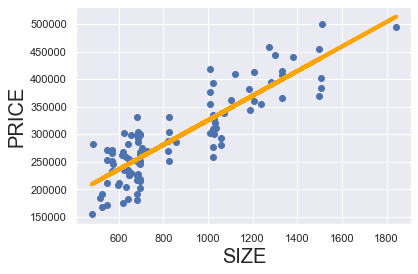

In [16]:
plt.scatter(x,y)
yhat=reg.coef_*x_mat+reg.intercept_
fig=plt.plot(x,yhat,lw=4,c='orange',label='Regression Line')
plt.xlabel('SIZE',fontsize=20)
plt.ylabel('PRICE',fontsize=20)
plt.show()